# Recommendation System Model Fitur 2
-------------

Content-based filtering is a recommendation system technique that suggests items to users based on the characteristics and properties of the items themselves. It focuses on analyzing the content, features, or attributes of items rather than relying on user behavior or preferences.

Content-based filtering has several advantages. It can provide recommendations for users with unique preferences, as it relies on item characteristics rather than collective behavior. It can also handle the "cold start" problem, where there is little or no user data available, as it doesn't heavily depend on user history.

However, content-based filtering also has limitations. It tends to recommend items similar to what the user has already consumed, which can result in a lack of serendipity or exposure to diverse content. It also requires accurate item representations and may struggle with capturing complex user preferences that go beyond the explicit features.

# Import Library

In [1]:
#Import the library to be used
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import linear_kernel
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.ma as ma
import math, re, sqlite3, os, tabulate, string, nltk
from scipy.sparse import csr_matrix
conn=sqlite3.connect(":memory:")
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
import scipy.sparse as sp
from sklearn.cluster import KMeans
from sklearn import metrics
from nltk.corpus import stopwords 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Import Dataset

In [2]:
file_path = r'C:\Users\LENOVO\Bangkit 2023\Barkit-ML\DATASET\recommendation system\reco_translate.csv'

if os.path.isfile(file_path):
    df = pd.read_csv(file_path)
    # Process the DataFrame as needed
else:
    print("File not found!")

In [3]:
df.head(6)

,partition_date,orderparentid,user_id,productcontentid,brand_id,category_id,category_name,gender,price,color_id,business_unit,ImageLink
0,20.08.2020 06:00,335057357,86386,39328996,919155,418,Sandal,Kadın,319.98,14.0,Sepatu bermerek b,https://cdn.dsmcdn.com//ty1/product/media/imag...
1,24.08.2020 10:00,337401625,59469,31903343,121,1827,Lemari kamar mandi,Unisex,1195.56,3.0,Pasar Taman & Yapi & Hardavat,https://cdn.dsmcdn.com//assets/product/media/i...
2,26.08.2020 19:00,338457012,51248,34726400,40,604,T-shirt,Kadın,37.99,14.0,Wanita PL,https://cdn.dsmcdn.com//assets/product/media/i...
3,22.08.2020 11:00,336681542,29380,32920640,7651,604,T-shirt,Kadın,24.99,6.0,Wanita a,https://cdn.dsmcdn.com//assets/product/media/i...
4,20.08.2020 19:00,335736916,68368,39035716,3395,599,Peloncat,Kadın,79.90,16.0,Wanita a,https://cdn.dsmcdn.com//ty1/product/media/imag...
5,20.08.2020 15:00,335512798,62395,5808634,8605,578,Brief,Kadın,19.95,17.0,Pakaian dalam,https://cdn.dsmcdn.com//Assets/ProductImages/o...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508228 entries, 0 to 508227
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   partition_date    508228 non-null  object 
 1   orderparentid     508228 non-null  int64  
 2   user_id           508228 non-null  int64  
 3   productcontentid  508228 non-null  int64  
 4   brand_id          508228 non-null  int64  
 5   category_id       508228 non-null  int64  
 6   category_name     508228 non-null  object 
 7   gender            475493 non-null  object 
 8   price             508228 non-null  float64
 9   color_id          375670 non-null  float64
 10  business_unit     508228 non-null  object 
 11  ImageLink         508228 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 46.5+ MB


# Data Preprocessing
-----

## Data Cleaning and Feature Selection

In [5]:
df.drop(['partition_date', 'ImageLink'], axis=1, inplace=True)

Product and Image Link columns from main dataset is cataloged.

In [6]:
pd.set_option('display.max_colwidth', None)
df.drop(df.index[3001:508229], inplace=True)
df.isna().isnull()
df.dropna(axis=0, inplace=True)

In [7]:
df.tail()

,orderparentid,user_id,productcontentid,brand_id,category_id,category_name,gender,price,color_id,business_unit
2996,332959716,47341,7152562,1479,448,Ransel,Unisex,188.00,14.0,Pakaian olahraga
2997,333903003,99487,36262388,8058,418,Sandal,Erkek,54.90,14.0,Sepatu bermerek b
2998,336023124,104906,3658998,12,975,Sneaker,Kadın,353.43,11.0,Gas Casual
2999,335295958,108249,43773492,754701,772,Charger & Cable,Unisex,10.00,3.0,Ponsel & Aksesori Seluler
3000,334387068,104518,38101653,40,526,Rok,Kadın,77.99,4.0,Wanita PL


In [8]:
df.dropna(axis=0, inplace=True)

In [9]:
gender_names = df['gender'].unique()
print(gender_names)

['Kadın' 'Unisex' 'Erkek']


In [10]:
df.loc[df['gender'] == 'Kadın', 'gender'] = 'wanita'
df.loc[df['gender'] == 'Erkek', 'gender'] = 'pria'
df.loc[df['gender'] == 'Unisex', 'gender'] = 'pria'
print(df['gender'].head(10))

0     wanita
1       pria
2     wanita
3     wanita
4     wanita
5     wanita
6     wanita
8       pria
10      pria
11      pria
Name: gender, dtype: object


In [11]:
df.head()

,orderparentid,user_id,productcontentid,brand_id,category_id,category_name,gender,price,color_id,business_unit
0,335057357,86386,39328996,919155,418,Sandal,wanita,319.98,14.0,Sepatu bermerek b
1,337401625,59469,31903343,121,1827,Lemari kamar mandi,pria,1195.56,3.0,Pasar Taman & Yapi & Hardavat
2,338457012,51248,34726400,40,604,T-shirt,wanita,37.99,14.0,Wanita PL
3,336681542,29380,32920640,7651,604,T-shirt,wanita,24.99,6.0,Wanita a
4,335736916,68368,39035716,3395,599,Peloncat,wanita,79.90,16.0,Wanita a


In [12]:
gender_names = df['category_name'].unique()
print(gender_names)

['Sandal' 'Lemari kamar mandi' 'T-shirt' 'Peloncat' 'Brief' 'Gaun'
 'Kursi kamp' 'Sneaker' 'BB & CC Cream' 'Sweatshirt' 'Cetakan oven & kue'
 'Upper-Up' 'Mouse' 'Set bayi' 'Bahan Dapur Praktis' 'T-Shirt Polo Yaka'
 'Pembalut kaki' 'Kaus kaki' 'Sikat rambut dan sisir' 'Atlet' 'Topi'
 'Kalung perak' 'Tumit klasik' 'Bahan persiapan lainnya' 'Kacamata hitam'
 'Jaket' 'Kaos Olahraga' 'Kemeja' 'Overall' 'Pelurusan rambut' 'BH'
 'Bantal' 'Jam' 'Jar & wadah penyimpanan' 'Rok' 'Pengatur'
 'Kotak Penyimpanan & Keranjang & Hurç' 'Jam pintar'
 'Aksesori Kamar Mandi' 'Pakaian olahraga enam' 'Sepatu santai'
 'Gelang perak' 'Blus' 'Jardiniere' 'Kebugaran - Kondisi'
 'Senjata mainan & senjata air' 'Petinju' 'Sepatu berjalan' 'Cover & Case'
 'Celana panjang' 'Meja' 'Rak sepatu' 'Sabuk' 'Kalung Bijouterie'
 'Celana pendek & Bermuda' 'Bikini' 'Parfum' 'Mainan yang dikendalikan'
 'Jeans' 'Istana' 'Tas bahu' 'Sendok' 'Cardigan' 'Baju renang'
 'Taplak meja' 'Tempat tidur' 'Kasus Cirlent & Crush' 'Set Hijab 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2151 entries, 0 to 3000
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   orderparentid     2151 non-null   int64  
 1   user_id           2151 non-null   int64  
 2   productcontentid  2151 non-null   int64  
 3   brand_id          2151 non-null   int64  
 4   category_id       2151 non-null   int64  
 5   category_name     2151 non-null   object 
 6   gender            2151 non-null   object 
 7   price             2151 non-null   float64
 8   color_id          2151 non-null   float64
 9   business_unit     2151 non-null   object 
dtypes: float64(2), int64(5), object(3)
memory usage: 184.9+ KB


*  **orderparentid**: The order id that all the product user bought in one order. 
*  **user_id**: Id of the user.
*  **productcontentid**: Id of the product.
*  **brand_id**: Id of the brand that products have.
*  **category_id** : Id of the category that product included.
*  **category_name.1**: Name of the category that product included.
*  **gender**: Gender assigned to the product.
*  **price**: Price of product.
*  **color_id**: Id of the color that products have.
*  **business_unit.1**: Business unit that products have

# Exploratory Data Analysis
-----

## Categori Insight

In [14]:
category=pd.DataFrame(df.groupby('category_name').size())
category.rename(columns={0:'size'},inplace=True)
category.sort_values(by='size',ascending=False,inplace=True)
category.reset_index(inplace=True)

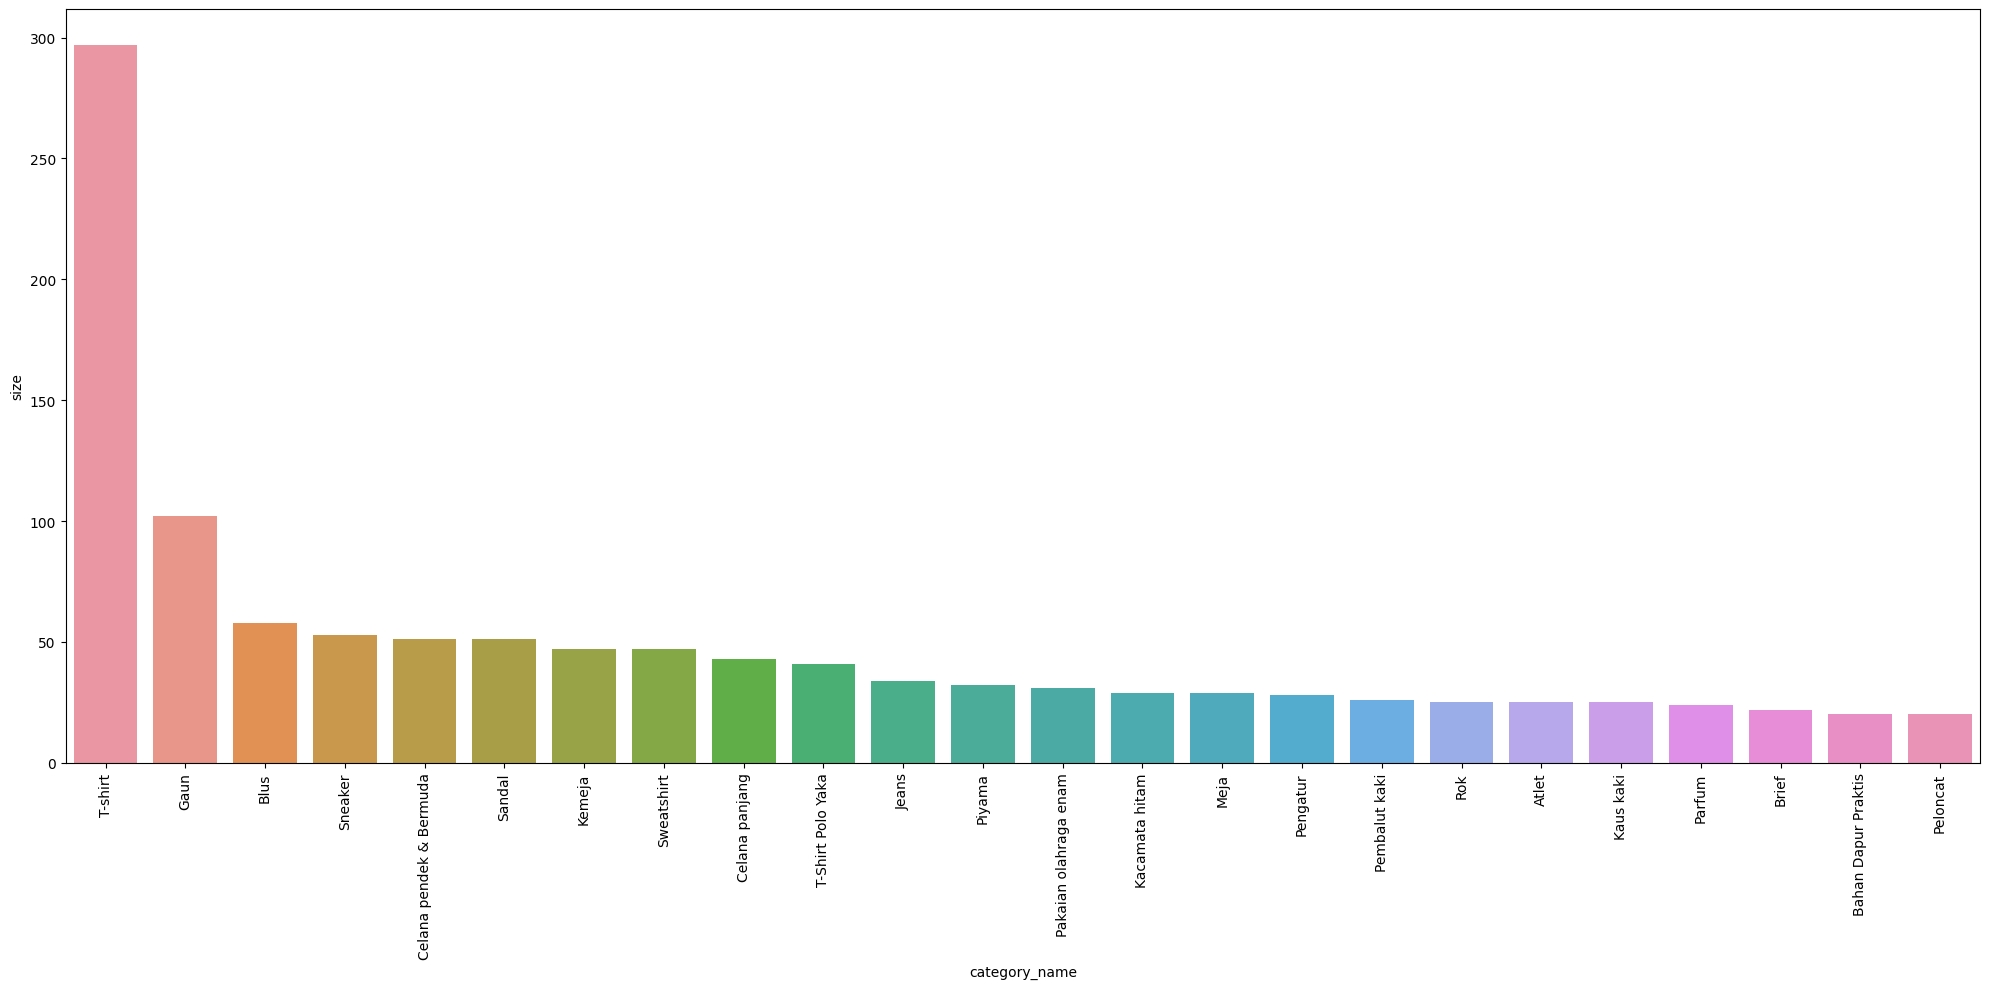

In [15]:
plt.figure(figsize=(20,10))
ax=sns.barplot(x='category_name',y='size',data=category.head(24))
plt.xticks(rotation=90)
plt.tight_layout()

In statistics and business, the concept of the long tail refers to the phenomenon where a large proportion of occurrences or sales come from less popular items, located far from the central or popular part of the distribution. There are only 24 category_name displayed in this graph. In the context of creating a recommendation system, it is crucial to increase the variety of categories to cater to user preferences in user-based recommendation engines.

## Business Unit Insight

In [16]:
bu=pd.DataFrame(df.groupby('business_unit').size())
bu.rename(columns={0:'size'},inplace=True)
bu.sort_values(by='size',ascending=False,inplace=True)
bu.reset_index(inplace=True)

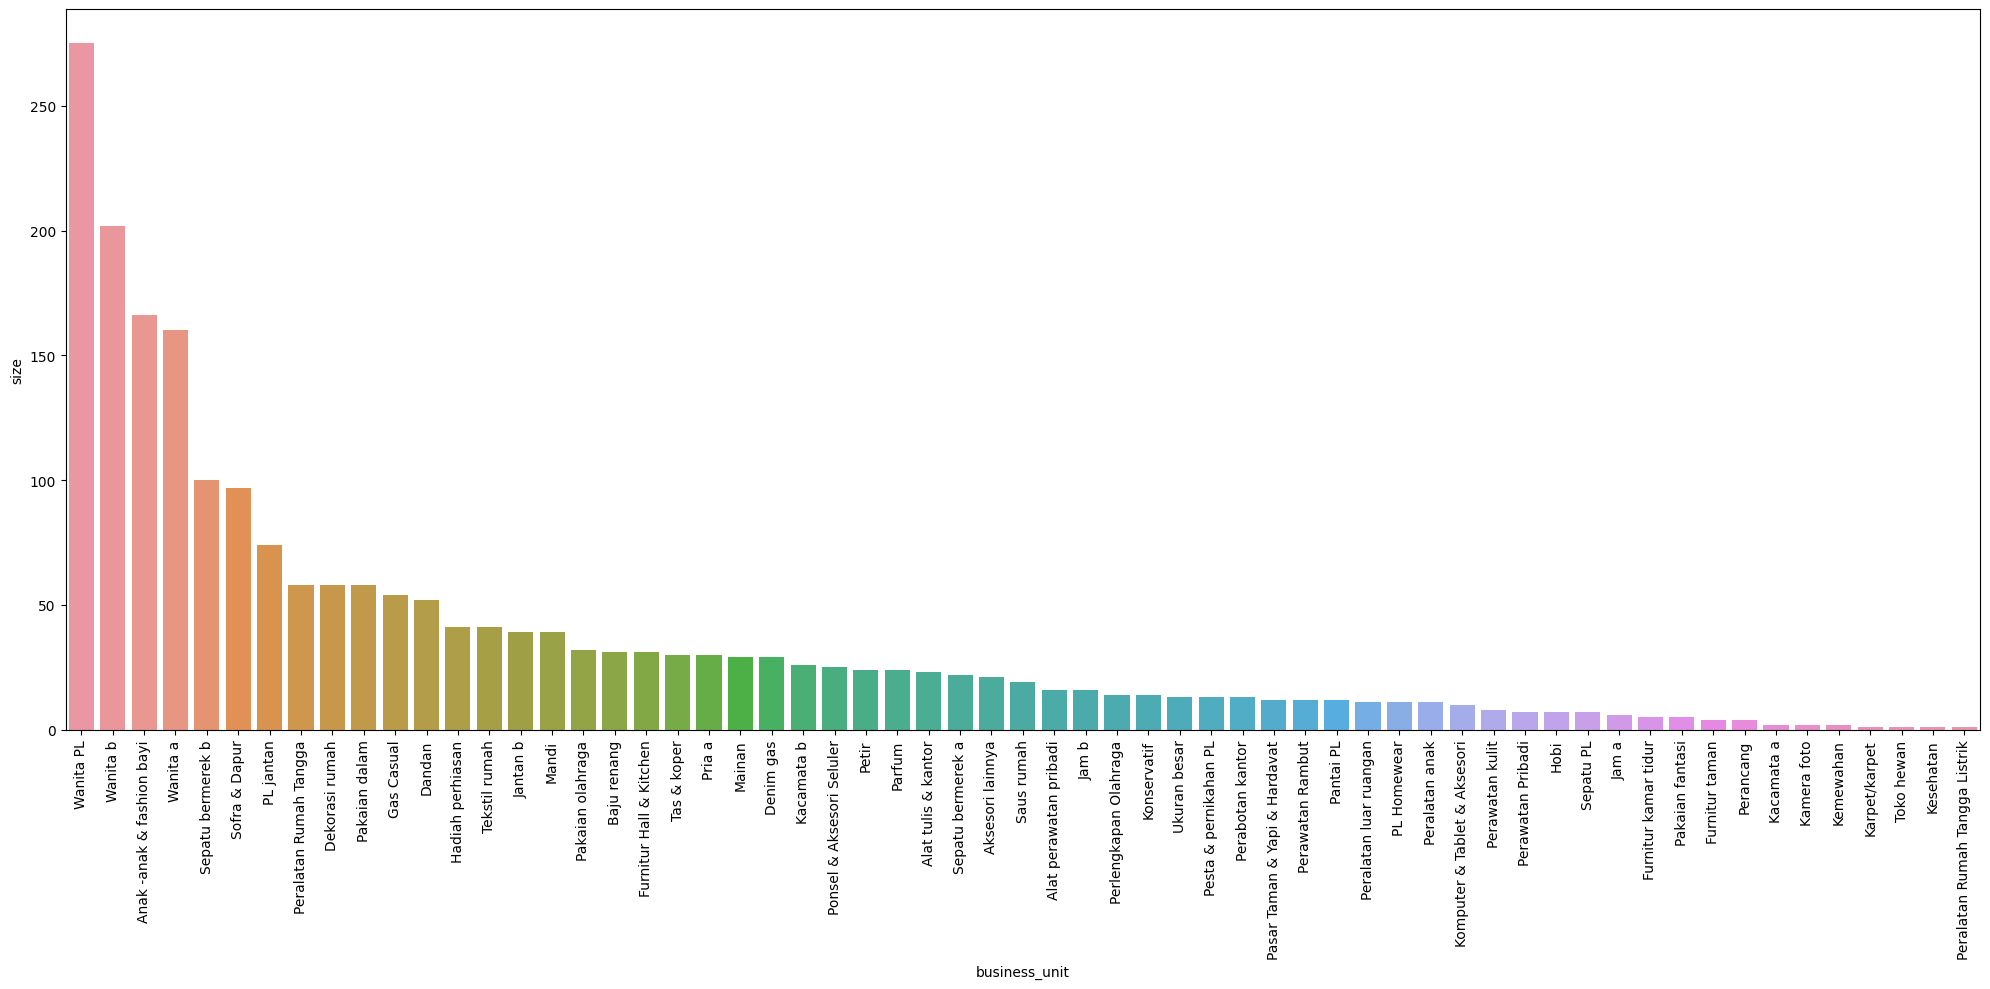

In [17]:
plt.figure(figsize=(20,10))
ax=sns.barplot(x='business_unit',y='size',data=bu.head(61))
plt.xticks(rotation=90)
plt.tight_layout()

The statistical pattern of the Long Tail can be observed in the graph above, where the majority of hits or sales are concentrated in the head or popular items. In the graph, only 61 business units are displayed, indicating the need to increase the diversity of business units in the recommendations provided to users.

## Gender Insight

In [18]:
gender=pd.DataFrame(df.groupby('gender').size())
gender.rename(columns={0:'size'},inplace=True)
gender.sort_values(by='size',ascending=False,inplace=True)
gender.reset_index(inplace=True)

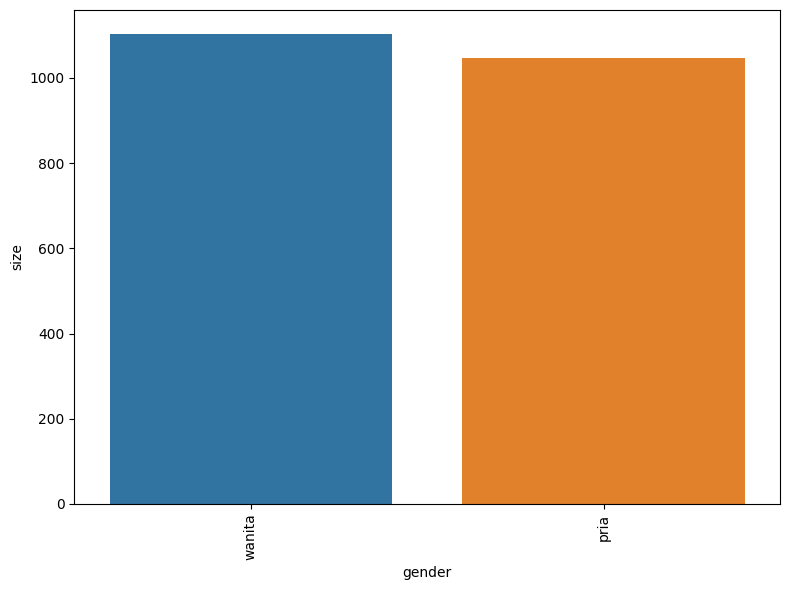

In [19]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x='gender',y='size',data=gender)
plt.xticks(rotation=90)
plt.tight_layout()

As shown above the female goods are more than the male gender. This graph shows the weight of gender across all items in e-commerce inventory sold in that period.

## Price Insight

In [20]:
df.price.describe()

count     2151.000000
mean        94.915862
std        326.989725
min          3.000000
25%         34.900000
50%         53.830000
75%         92.095000
max      10678.260000
Name: price, dtype: float64

Most of the price tag is in range to 90 TL.But there are many variety of price tag is exist in the data.

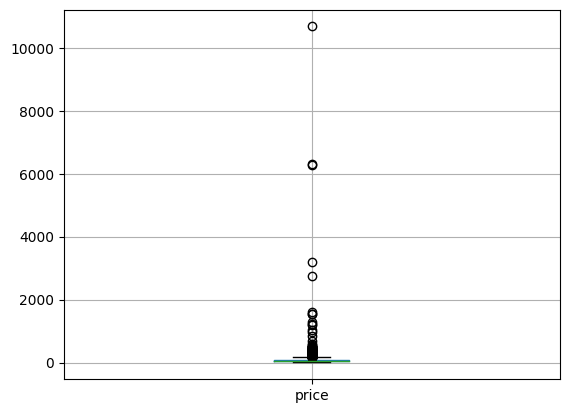

In [21]:
boxplot = df.boxplot(column=['price'])

When outliers inspected the price information of outliers are displayed with their own value.

In [22]:
df[df.price>1500].groupby('category_name').size().sum()

8

There are only 8 products higher than the 1500 TL.

## Normalization


In [23]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Take the "Price" column and reshape it into an array
Price = df['price'].values.reshape(-1, 1)

# Perform Min-Max Scaling on the "Price" column
Price_scaled = scaler.fit_transform(Price)


# Replace the values in the "Price" column with the scaled values
df['price'] = Price_scaled


df.head()

,orderparentid,user_id,productcontentid,brand_id,category_id,category_name,gender,price,color_id,business_unit
0,335057357,86386,39328996,919155,418,Sandal,wanita,0.029693,14.0,Sepatu bermerek b
1,337401625,59469,31903343,121,1827,Lemari kamar mandi,pria,0.111713,3.0,Pasar Taman & Yapi & Hardavat
2,338457012,51248,34726400,40,604,T-shirt,wanita,0.003278,14.0,Wanita PL
3,336681542,29380,32920640,7651,604,T-shirt,wanita,0.002060,6.0,Wanita a
4,335736916,68368,39035716,3395,599,Peloncat,wanita,0.007204,16.0,Wanita a


## Label Encoding

In [24]:
# Initialize LabelEncoder
le = LabelEncoder()

# Encoding attribute "color_id"
df['color_id'] = le.fit_transform(df['color_id'])

# Encoding attribute "category_name"
#df['category_name'] = le.fit_transform(df['category_name'])

df.head()

,orderparentid,user_id,productcontentid,brand_id,category_id,category_name,gender,price,color_id,business_unit
0,335057357,86386,39328996,919155,418,Sandal,wanita,0.029693,13,Sepatu bermerek b
1,337401625,59469,31903343,121,1827,Lemari kamar mandi,pria,0.111713,2,Pasar Taman & Yapi & Hardavat
2,338457012,51248,34726400,40,604,T-shirt,wanita,0.003278,13,Wanita PL
3,336681542,29380,32920640,7651,604,T-shirt,wanita,0.002060,5,Wanita a
4,335736916,68368,39035716,3395,599,Peloncat,wanita,0.007204,15,Wanita a


# Content Based Recommendation System
----

## Determining Product Similarities

### Determining Weight For Gender

In this section, the gender weight assigned to each product will be calculated based on all the sales that have been made, without taking into account user behavior.

In [25]:
df_gender=df[['gender','productcontentid']]
df_gender.to_sql("df_gender",conn,if_exists='replace')

2151

Using SQL queries, the dataframe will be grouped, and the weight of gender will be calculated for each order across all sales.

In [26]:
gender = pd.read_sql(
    """
    select gender, count(1) n
    from df_gender
    group by gender
    order by n desc
    """,conn
)

gender['g_weight']= gender[['n']].transform(lambda x: x/x.sum())

Essentially, the gender weight for each product is determined by dividing the size of the gender-specific products by the total size of all products. These weights are then incorporated into the main data frame.

In [27]:
df1=df.merge(gender,on='gender').drop('n',axis=1)

### Determining Weight For Business Unit


In this section, the weights of all the business units are calculated based on their contribution to all the orders.

In [28]:
scenario1=df.drop(['orderparentid','user_id','color_id', 'gender','price'],axis=1)

In [29]:
import sqlite3
conn=sqlite3.connect(":memory:")

scenario1.to_sql("scenario1",conn,if_exists='replace')

bu_unit= pd.read_sql(
    """
    select business_unit, count(1) n
    from scenario1
    group by business_unit
    order by n desc
    """,conn
)

In [30]:
bu_unit['b_weight']= bu_unit[['n']].transform(lambda x: x/x.sum())
bu_unit=bu_unit.drop('n',axis=1)
df1=df1.merge(bu_unit,on=['business_unit'])


All the weights associated with the business units have been consolidated into the main data frame.


### Determining Weight For Category 

In this section, the weights for all categories are calculated based on their prevalence across all orders.

In [31]:
category=pd.read_sql(
    """
    select business_unit,category_name, count(1) n
    from scenario1
    group by  category_name ,business_unit
    order by n desc
    """
    ,conn)

In [32]:
category['c_weight']=category[['n']].transform(lambda x: x/x.sum())
category=category.drop('n',axis=1)
df1=df1.merge(category,on=['category_name','business_unit'])

### Construct Main Weight For Products

The weights are adjusted based on their significance to achieve the desired recommendation system.

In [33]:
df1['weight'] = df1.c_weight * 0.5 + df1.g_weight * 0.2 + df1.b_weight * 0.3
df1=df1.drop(['c_weight','g_weight','b_weight'],axis=1)

To introduce diversity within the range of all the categories we have worked on, we have implemented a strategy to group the data. The primary objective is to showcase a wide variety of products to users who have no behavioral data in the database, while still focusing on popular items within that range.

In [34]:
recommendation=df1.sort_values('weight',ascending=False).drop_duplicates(subset=['business_unit','gender'], keep="first").drop_duplicates(subset=['category_name','gender'],keep='first')

In [35]:
recommendation

,orderparentid,user_id,productcontentid,brand_id,category_id,category_name,gender,price,color_id,business_unit,weight
163,338072709,85735,35024763,40,604,T-shirt,wanita,0.002997,10,Wanita PL,0.168201
755,336229836,50877,44182731,4931,1182,Gaun,wanita,0.007868,3,Wanita b,0.138029
759,336485382,37159,44137888,23319,1182,Gaun,pria,0.009085,13,Wanita b,0.132729
405,330543190,107151,44166180,13904,604,T-shirt,pria,0.005339,2,Wanita a,0.130126
51,325842806,96600,7025435,15214,975,Sneaker,wanita,0.009085,3,Sepatu bermerek b,0.125662
...,...,...,...,...,...,...,...,...,...,...,...
2145,330881291,86049,43150002,978288,764,Aksesori Foto & Kamera,pria,0.018360,2,Kamera foto,0.098094
2147,334172238,96677,32457994,23248,1852,Negara,pria,0.006320,2,Karpet/karpet,0.097722
2148,332793832,84587,35788747,274798,1288,Mainan kucing,pria,0.001124,2,Toko hewan,0.097722
2149,326037199,97655,34391996,292298,1820,Pengocok & aksesori,pria,0.000748,2,Kesehatan,0.097722



All the weights are derived explicitly from users, not based on user rankings, but rather based on popularity rankings.

## Convert Textual Data Into a Vector Matrix Product 

The tf-idf weight is a statistical measure that indicates the importance of a term in a document. It takes into account both the frequency of the term within the document (tf) and the importance of the term within the corpus (idf).

The tf component of the tf-idf weight calculates the frequency of a term in a document by dividing the number of times the term appears in the document by the total number of terms in the document.

The idf component measures the importance of a given term in the corpus by calculating the logarithm base e of the total number of documents divided by the number of documents that contain the term.

By combining tf and idf, the tf-idf weight provides a measure of how significant a term is in a document, considering its frequency within the document and its rarity within the corpus.

In [36]:
df2=df1.copy()
df2=df2.sample(1422)
df2.head()

,orderparentid,user_id,productcontentid,brand_id,category_id,category_name,gender,price,color_id,business_unit,weight
207,331834795,20890,36361687,40,604,T-shirt,wanita,0.003465,13,Wanita PL,0.168201
1079,327403218,76162,43229906,19,604,T-shirt,pria,0.016576,14,Gas Casual,0.109066
1171,324339348,108740,35584727,121,583,Baju renang,wanita,0.031475,11,Baju renang,0.108136
260,334545037,97404,34421057,40,1182,Gaun,wanita,0.011896,5,Wanita PL,0.152162
1251,324390581,91343,37575467,15770,483,Taplak meja,pria,0.002997,16,Tekstil rumah,0.103766


Initially, the description column was created to consolidate the textual data from the main database.

In [37]:
#df2['description'] = df2['business_unit'].str.cat(" " + df2['category_name'])
#df2 = df2[['productcontentid', 'description']]

df2['description']=df2.business_unit.str.cat(" "+df2.category_name.str.cat(" "+df2.gender))
df2=df2[['productcontentid','description']]

tfidf_matrix constructed by fit_transform method. Then we compute similarity between all products using SciKit Learn's linear_kernel. Note that the tf-idf functionality in sklearn.feature_extraction.text can produce normalized vectors, in which case cosine_similarity is equivalent to linear_kernel

In [38]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df2['description'])
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)


In [39]:
df2=df2.reset_index().drop('index',axis=1)

In [40]:
df2.head()

,productcontentid,description
0,36361687,Wanita PL T-shirt wanita
1,43229906,Gas Casual T-shirt pria
2,35584727,Baju renang Baju renang wanita
3,34421057,Wanita PL Gaun wanita
4,37575467,Tekstil rumah Taplak meja pria


## Prediction

In [41]:
results= {}

To identify the most relevant documents, we can utilize the *cosine_similarities.argsort()* function to obtain the sorted indices of document similarities, which allows us to retrieve the most related document similarity values.

#### Using Cosine Similarities

In [42]:
for idx, row in df2.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-100:-1]
    similar_items = [(cosine_similarities[idx][i], df2['productcontentid'][i]) for i in similar_indices]
    results[row['productcontentid']] = similar_items[1:]

In [43]:
def item(id):
    return df2.loc[df2['productcontentid'] == id]['description'].tolist()[0]

In [44]:
def recommend(product_id, num_recommendations):
    if product_id not in results:
        print("Produk dengan ID tersebut tidak ditemukan.")
        return
    print("Rekomendasi untuk Produk dengan ID", product_id)
    similar_items = results[product_id][:num_recommendations]
    for item in similar_items:
        print("Produk:", item[1])
        print("Similarity Score:", item[0])
        print("Deskripsi:", item[1])  # Menggunakan item[1] untuk memanggil ID produk
        print()


In [45]:
recommend(36361687, 5)


Rekomendasi untuk Produk dengan ID 36361687
Produk: 35627439
Similarity Score: 1.0
Deskripsi: 35627439

Produk: 35627439
Similarity Score: 1.0
Deskripsi: 35627439

Produk: 36848090
Similarity Score: 1.0
Deskripsi: 36848090

Produk: 35845260
Similarity Score: 1.0
Deskripsi: 35845260

Produk: 36880612
Similarity Score: 1.0
Deskripsi: 36880612



#### Using Liniear Kernel

In [47]:
from sklearn.metrics.pairwise import linear_kernel

# Menghitung kernel menggunakan linear kernel
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

results = {}

# Membuat daftar item yang mirip
for idx, row in df2.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-100:-1]
    similar_items = [(cosine_similarities[idx][i], df2['productcontentid'][i]) for i in similar_indices]
    results[row['productcontentid']] = similar_items[1:]

def item(id):
    return df2.loc[df2['productcontentid'] == id]['description'].tolist()[0]

def recommend(product_id, num_recommendations):
    if product_id not in results:
        print("Produk dengan ID tersebut tidak ditemukan.")
        return
    print("Rekomendasi untuk Produk dengan ID", product_id)
    similar_items = results[product_id][:num_recommendations]
    for item in similar_items:
        print("Produk:", item[1])
        print("Similarity Score:", item[0])
        print("Deskripsi:", item[1])  # Menggunakan item[1] untuk memanggil ID produk
        print()

recommend(36361687, 5)

Rekomendasi untuk Produk dengan ID 36361687
Produk: 35627439
Similarity Score: 1.0
Deskripsi: 35627439

Produk: 35627439
Similarity Score: 1.0
Deskripsi: 35627439

Produk: 36848090
Similarity Score: 1.0
Deskripsi: 36848090

Produk: 35845260
Similarity Score: 1.0
Deskripsi: 35845260

Produk: 36880612
Similarity Score: 1.0
Deskripsi: 36880612



## Feature Representation

In [48]:
# Mengonversi kolom 'productcontentid' menjadi string
df2['productcontentid'] = df2['productcontentid'].astype(str)

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Representasi TF-IDF untuk fitur "productcontentid"
productcontentid_tfidf = tfidf_vectorizer.fit_transform(df2['productcontentid'])

# Representasi TF-IDF untuk fitur "Description"
description_tfidf = tfidf_vectorizer.fit_transform(df2['description'])


# Menampilkan representasi TF-IDF
print("Representasi TF-IDF untuk Deskripsi:")
print(description_tfidf)


Representasi TF-IDF untuk Deskripsi:
  (0, 309)	0.5586480515531923
  (0, 262)	0.5394296783158185
  (0, 358)	0.6300222032975619
  (1, 269)	0.2454667344156095
  (1, 55)	0.6496462176799943
  (1, 105)	0.5928816656529567
  (1, 309)	0.407672913843917
  (2, 281)	0.7112878240580077
  (2, 18)	0.6929669635189668
  (2, 358)	0.11775575917180202
  (3, 106)	0.6627915287790358
  (3, 262)	0.4870083662368805
  (3, 358)	0.568797187575706
  (4, 199)	0.4717353435945927
  (4, 333)	0.6531765743714982
  (4, 288)	0.3238686976716038
  (4, 336)	0.4682797566663408
  (4, 269)	0.16324602433449395
  (5, 319)	0.6554569701669215
  (5, 33)	0.5217111307292891
  (5, 303)	0.49371780221422185
  (5, 269)	0.23331606911981984
  (6, 280)	0.5689514493179239
  (6, 194)	0.8099842965879817
  (6, 269)	0.14219594790255577
  :	:
  (1415, 307)	0.4039960250133526
  (1415, 25)	0.6035311624169197
  (1415, 95)	0.3047112277838842
  (1415, 10)	0.5978330616201588
  (1415, 269)	0.1492784172658508
  (1416, 253)	0.5526349959354815
  (1416, 185

In [49]:
print("TF-IDF representation for Preferensi Pengguna:")
print(productcontentid_tfidf)

TF-IDF representation for Preferensi Pengguna:
  (0, 390)	1.0
  (1, 837)	1.0
  (2, 318)	1.0
  (3, 210)	1.0
  (4, 499)	1.0
  (5, 619)	1.0
  (6, 543)	1.0
  (7, 924)	1.0
  (8, 513)	1.0
  (9, 603)	1.0
  (10, 209)	1.0
  (11, 1056)	1.0
  (12, 975)	1.0
  (13, 19)	1.0
  (14, 583)	1.0
  (15, 104)	1.0
  (16, 810)	1.0
  (17, 157)	1.0
  (18, 258)	1.0
  (19, 116)	1.0
  (20, 904)	1.0
  (21, 1035)	1.0
  (22, 908)	1.0
  (23, 406)	1.0
  (24, 675)	1.0
  :	:
  (1397, 83)	1.0
  (1398, 615)	1.0
  (1399, 416)	1.0
  (1400, 109)	1.0
  (1401, 364)	1.0
  (1402, 302)	1.0
  (1403, 425)	1.0
  (1404, 617)	1.0
  (1405, 171)	1.0
  (1406, 446)	1.0
  (1407, 647)	1.0
  (1408, 7)	1.0
  (1409, 799)	1.0
  (1410, 601)	1.0
  (1411, 780)	1.0
  (1412, 1046)	1.0
  (1413, 560)	1.0
  (1414, 669)	1.0
  (1415, 146)	1.0
  (1416, 289)	1.0
  (1417, 1071)	1.0
  (1418, 885)	1.0
  (1419, 802)	1.0
  (1420, 1102)	1.0
  (1421, 516)	1.0


## Cosine Similarity

In [50]:
# Combine the two representation matrices into one matrix
feature_matrix = sp.hstack((description_tfidf, productcontentid_tfidf))

# Compute similarities between items using cosine similarity
similarities = cosine_similarity(feature_matrix)

# Display the similarity matrix
print("Similarity Matrix:")
print(similarities)

Similarity Matrix:
[[1.         0.11387284 0.03709437 ... 0.16539671 0.         0.        ]
 [0.11387284 1.         0.         ... 0.         0.02418147 0.0173084 ]
 [0.03709437 0.         1.         ... 0.03091385 0.         0.        ]
 ...
 [0.16539671 0.         0.03091385 ... 1.         0.         0.        ]
 [0.         0.02418147 0.         ... 0.         1.         0.01389263]
 [0.         0.0173084  0.         ... 0.         0.01389263 1.        ]]


## Similarity Clustering

In [51]:
# Grouping Items Based on Similarity
def group_similarities(similarity_matrix, k):
    n_items = similarity_matrix.shape[0]
    similar_items = []

    for i in range(n_items):
        # Get the similarities of item i with other items
        similarities = similarity_matrix[i]

        # Sort the indices of items based on similarity values
        sorted_indices = np.argsort(similarities)[::-1]

        # Get the top k items with the highest similarity
        top_k_indices = sorted_indices[1:k+1]  # Exclude similarity with itself

        # Store the items with the highest similarity in a list
        similar_items.append(top_k_indices)

    return similar_items

# Example usage
k = 5  # Number of top items to be retrieved
similar_items = group_similarities(similarities, k)

# Display the results of similarity grouping
for i, items in enumerate(similar_items):
    print("Item", i+1, ":")
    for item in items:
        print("  - Item", item+1)

Item 1 :
  - Item 798
  - Item 930
  - Item 922
  - Item 887
  - Item 869
Item 2 :
  - Item 683
  - Item 124
  - Item 626
  - Item 622
  - Item 1205
Item 3 :
  - Item 665
  - Item 1193
  - Item 45
  - Item 1322
  - Item 713
Item 4 :
  - Item 1255
  - Item 546
  - Item 473
  - Item 1217
  - Item 1185
Item 5 :
  - Item 607
  - Item 259
  - Item 173
  - Item 10
  - Item 1304
Item 6 :
  - Item 95
  - Item 543
  - Item 1396
  - Item 1069
  - Item 533
Item 7 :
  - Item 676
  - Item 1356
  - Item 1422
  - Item 640
  - Item 255
Item 8 :
  - Item 1214
  - Item 842
  - Item 349
  - Item 463
  - Item 55
Item 9 :
  - Item 1155
  - Item 1403
  - Item 946
  - Item 317
  - Item 1158
Item 10 :
  - Item 133
  - Item 1321
  - Item 1304
  - Item 929
  - Item 173
Item 11 :
  - Item 750
  - Item 1401
  - Item 405
  - Item 781
  - Item 20
Item 12 :
  - Item 1353
  - Item 30
  - Item 1093
  - Item 1287
  - Item 539
Item 13 :
  - Item 1002
  - Item 1398
  - Item 1078
  - Item 110
  - Item 971
Item 14 :
  - It

# Content Based Filtering
------

In [52]:
def content_based_filtering(item_id, similar_items, df):
    recommendations = []

    for item in similar_items[item_id]:
        recommendations.append(item)

    # Remove the item itself from the recommendations list
    recommendations = list(set(recommendations) - set([item_id]))

    # Get the product data based on the IDs if the IDs exist in the DataFrame index
    recommended_products = df[df.index.isin(recommendations)]

    return recommended_products

## Example Usage: Content-Based Filtering for Recommending Products".

In [53]:
print(df1.loc[1])

# Example usage
item_id = 1  # ID of the item to be recommended
recommended_products = content_based_filtering(item_id, similar_items, df2)

# Displaying recommended products
print("\n Recommended Products for Item", item_id+1, ":")
recommended_products

orderparentid               327278479
user_id                        111748
productcontentid             37286015
brand_id                         3519
category_id                       419
category_name                  Sandal
gender                         wanita
price                        0.004402
color_id                            2
business_unit       Sepatu bermerek b
weight                       0.124035
Name: 1, dtype: object

 Recommended Products for Item 2 :


,productcontentid,description
123,42422143,Gas Casual T-shirt pria
621,42422143,Gas Casual T-shirt pria
625,44490056,Gas Casual T-shirt pria
682,4738735,Gas Casual T-shirt pria
1204,45548257,Gas Casual T-shirt pria


In [54]:
print(df1.loc[62])

# Example usage
item_id = 562  # ID of the item to be recommended
recommended_products = content_based_filtering(item_id, similar_items, df2)

# Displaying recommended products
print("\n Recommended Products for Item", item_id+1, ":")
recommended_products

orderparentid               327291881
user_id                         64532
productcontentid             29711609
brand_id                         2533
category_id                       975
category_name                 Sneaker
gender                           pria
price                        0.006275
color_id                           13
business_unit       Sepatu bermerek b
weight                       0.120363
Name: 62, dtype: object

 Recommended Products for Item 563 :


,productcontentid,description
329,40982741,Wanita PL Peloncat wanita
380,6636524,Wanita PL Peloncat wanita
983,7907936,Wanita PL Peloncat wanita
1066,6636524,Wanita PL Peloncat wanita
1230,7907936,Wanita PL Peloncat wanita


In [55]:
print(df1.loc[387])

# Example usage
item_id = 31  # ID of the item to be recommended
recommended_products = content_based_filtering(item_id, similar_items, df2)

# Displaying recommended products
print("\n Recommended Products for Item", item_id+1, ":")
recommended_products

orderparentid       327136491
user_id                 48743
productcontentid     37627905
brand_id                 2685
category_id               604
category_name         T-shirt
gender                 wanita
price                0.002525
color_id                   11
business_unit        Wanita a
weight               0.135425
Name: 387, dtype: object

 Recommended Products for Item 32 :


,productcontentid,description
312,39129239,PL jantan T-shirt pria
363,42634304,PL jantan T-shirt pria
1116,34200045,PL jantan T-shirt pria
1143,37355463,PL jantan T-shirt pria
1218,40214242,PL jantan T-shirt pria


In [56]:
print(df1.loc[1000])

# Example usage
item_id = 900  # ID of the item to be recommended
recommended_products = content_based_filtering(item_id, similar_items, df2)

# Displaying recommended products
print("\n Recommended Products for Item", item_id+1, ":")
recommended_products

orderparentid              336610184
user_id                        94219
productcontentid            31296928
brand_id                       30687
category_id                     1247
category_name           Kalung perak
gender                        wanita
price                       0.010015
color_id                          11
business_unit       Hadiah perhiasan
weight                      0.111158
Name: 1000, dtype: object

 Recommended Products for Item 901 :


,productcontentid,description
312,39129239,PL jantan T-shirt pria
1116,34200045,PL jantan T-shirt pria
1143,37355463,PL jantan T-shirt pria
1155,38181314,PL jantan T-shirt pria
1218,40214242,PL jantan T-shirt pria


## Evaluate Model

In [57]:
def evaluate_model(actual_recommendations, predicted_recommendations):
    true_positives = 0
    false_positives = 0
    false_negatives = 0

    for i in range(len(actual_recommendations)):
        actual = set(actual_recommendations[i])
        if i < len(predicted_recommendations):  
            predicted = set(predicted_recommendations[i])
            true_positives += len(actual.intersection(predicted))
            false_positives += len(predicted.difference(actual))
            false_negatives += len(actual.difference(predicted))
        else:
            false_negatives += len(actual)  

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    # Perhitungan akurasi
    total_predictions = true_positives + false_positives
    accuracy = true_positives / total_predictions if total_predictions != 0 else 0

    return precision, recall, f1_score, accuracy

In [58]:
#SPLIT DATA
train_data, test_data = train_test_split(df2, test_size=0.2, random_state=42)


# Use the model to make recommendations on the test data
recommendations = []
for item_id in test_data.index:
    if any(item_id in items for items in similar_items):
        recommended_products = content_based_filtering(item_id, similar_items, train_data)
        recommendations.append(recommended_products)

# Convert the model's recommendation data to a list
predicted_recommendations = recommended_products['description'].tolist()
# Evaluate the model's performance with the test data
actual_recommendations = test_data['description'].tolist()
precision, recall, f1_score, accuracy = evaluate_model(actual_recommendations, predicted_recommendations)

# Display the evaluation results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

Accuracy: 0.6
Precision: 0.6
Recall: 0.008341056533827619
F1-score: 0.016453382084095063
